In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

# 머신러닝 패키지
import tensorflow as tf 
from keras import layers 

# 데이터셋 불러오기
data = pd.read_csv('1958881A4B17C8519E.csv')

# Train set : Test set 비율 7:3
train_data = data.sample(frac=0.7, random_state=42)
test_data = data.drop(train_data.index)

# Import한 데이터 구조(레코드 수, 변수 수) 출력
print("Shape of data: ", data.shape)

# Train, Test set의 레코드 수 출력
print("Number of records in train set: ", len(train_data))
print("Number of records in test set: ", len(test_data))

# 데이터 시각화
sns.pairplot(data)
plt.show()


: 

: 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


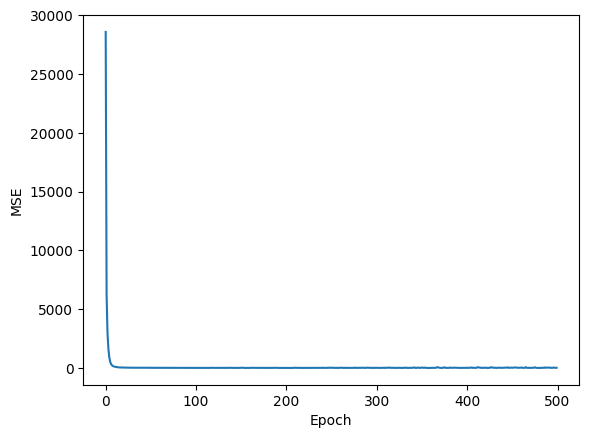

5/5 [==============================] - 0s 2ms/step


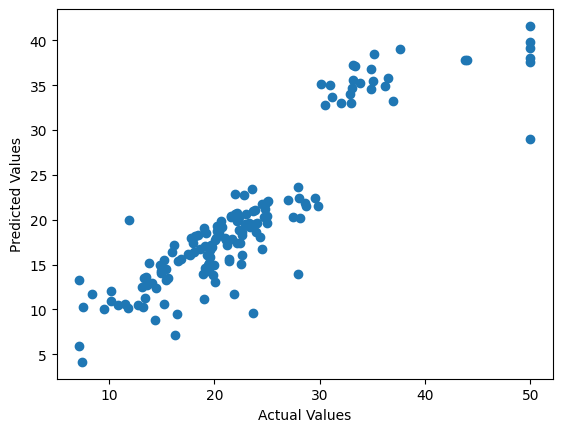

MSE on Test Set: 23.44


In [ ]:
# train set의 변수와 목표 변수 선택
x_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV'] 

# Multiple linear regression 모델 생성
linear_model = keras.Sequential([
    layers.Dense(units=1, input_shape=[x_train.shape[1]])
])

# 생성한 Linear regression 모델의 구조 확인 
linear_model.summary()

# 최적화 방법 정의
linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# 500 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = linear_model.fit(x_train, y_train, epochs=500, validation_split=0.2, verbose=0)

# 결과 시각화
mse_list = history.history['loss']
plt.plot(np.arange(len(mse_list)), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

# Test set 예측
x_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']
y_test_pred = linear_model.predict(x_test)

# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# MSE 계산
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on Test Set: {mse_test:.2f}")


Epoch: 0 / MSE: 1.450471070207928e+29
Epoch: 50 / MSE: 3.5921334472908233e+27
Epoch: 100 / MSE: 1.48140281812116e+28
Epoch: 150 / MSE: 4.7729110630454005e+28
Epoch: 200 / MSE: 3.817948180954401e+26
Epoch: 250 / MSE: 3.0198964003877155e+28
Epoch: 300 / MSE: 4.923694595117803e+27
Epoch: 350 / MSE: 1.2198536945361383e+28
Epoch: 400 / MSE: 1.1162326826935453e+28
Epoch: 450 / MSE: 3.589502492976627e+28


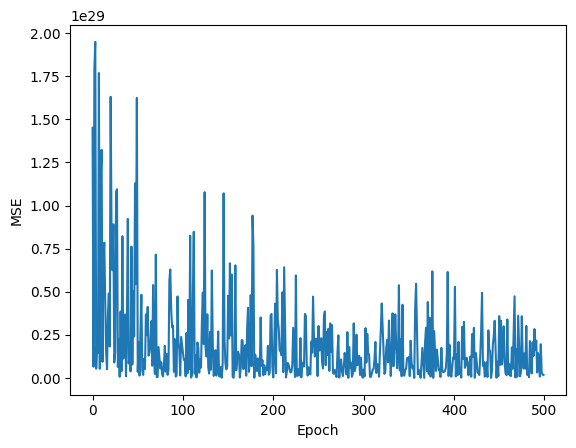

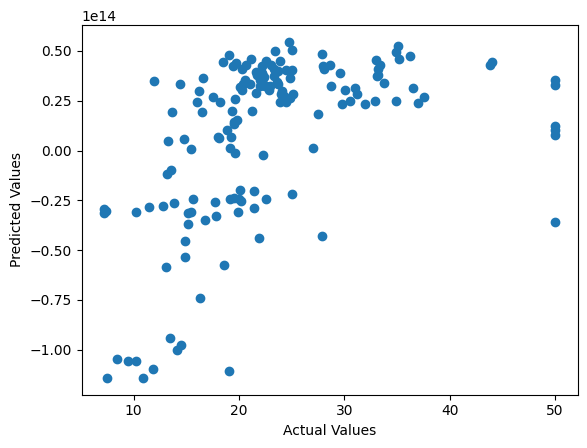

MSE on Test Set: 1803778188040672986315882496.00


In [ ]:

# 모델 생성
model = SGDRegressor(loss='squared_error', alpha=0.1, max_iter=500, tol=1e-3)

# train set의 변수와 목표 변수 선택
x_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV'] 

# 모델 학습
mse_list = []
for epoch in range(500):
    model.partial_fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    mse = mean_squared_error(y_train, y_train_pred)
    mse_list.append(mse)
    if epoch % 50 == 0:
        print(f"Epoch: {epoch} / MSE: {mse}")

# 결과 시각화
plt.plot(np.arange(500), mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

# Test set 예측
x_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']
y_test_pred = model.predict(x_test)

# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# MSE 계산
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on Test Set: {mse_test:.2f}")








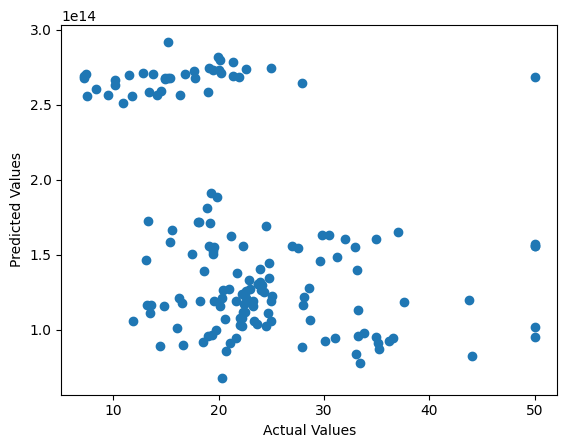

Test MSE: 3.0541495212424104e+28


In [ ]:
# Test set 평가
x_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']
y_test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)

# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 평가 결과 출력
print(f"Test MSE: {test_mse}")
